In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 用松弛变量$\zeta$处理非线性可分

引入松弛变量$\zeta$的目的是：**处理非线性可分数据，放松线性约束需要，允许在分类错误存在的情况下通过适当的惩罚来确保优化可以收敛**

将阳性松弛变量加入线性约束：

$$w_0 + \mathbf{w}^T \mathbf{x}^{(i)} \geq 1-\zeta^{(i)} \quad if \ y^{(i)}=1$$

$$w_0+\mathbf{w}^T \mathbf{x}^{(i)} \leq -1+\zeta^{(i)} \quad if \ y^{(i)}=-1$$

$$for \  i=1...N$$

因此新的最小化目标（约束主体）就表示为：

$$\frac{1}{2}||\mathbf{w}||^2 + C (\sum\limits_i \xi{(i)})$$

可以通过控制变量$C$来控制对分类错误的惩罚。

$C$值越大相应的错误惩罚就越大，如果选择较小的$C$值，则对分类错误的要求不那么严格。

如图所示

![不同的参数C取值效果](./img/sklearn中svc的松弛变量C.png)

训练一个支持向量机模型

In [4]:
from sklearn.svm import SVC
from utils.plot_decision_regions import plot_decision_regions

d:\Code\Python\Python_Machine_Learning_Code\utils\plot_decision_regions.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


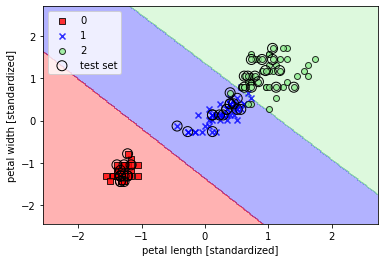

In [5]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

在实际的分类任务中，线性逻辑回归和线性支持向量机通常会产生非常相似的结果。

- 逻辑回归试图最大化训练数据的条件似然性，使其比SVM更容易离群（更简单易实现，易更新处理流式数据时更有吸引力）
- 支持向量机主要关心的是最接近决策边界的点